<a href="https://colab.research.google.com/github/galileo15640215/data_analysis/blob/master/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
!pip install pandas-datareader
import pandas_datareader.data as web

In [0]:
from datetime import datetime

In [0]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [0]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [0]:
for stock in tech_list:
  globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

In [13]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,189.555179,185.826853,187.697212,187.696415,3.270368e+07,186.073439
std,22.271683,21.992871,22.127485,22.153462,1.416082e+07,21.931422
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.044998,169.800003,171.449997,171.004997,2.288735e+07,170.214981
50%,187.399994,184.940002,186.289993,186.050003,2.936840e+07,184.223236
75%,209.375000,205.784996,207.320000,207.760002,3.907040e+07,205.900421
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-03-06 to 2019-03-05
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


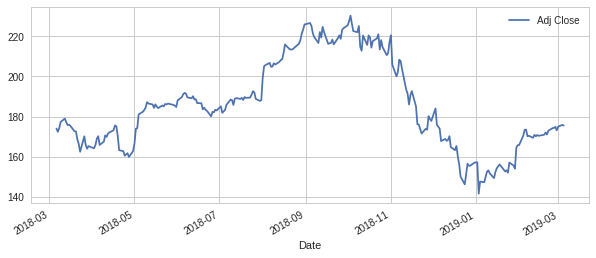

In [15]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

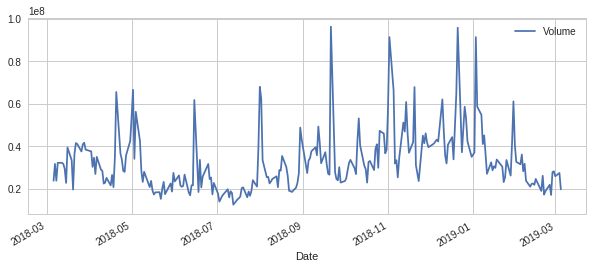

In [16]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [17]:
ma_day = [10, 20, 50]
for ma in ma_day:
  column_name = 'MA {}'.format(ma)
  AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


In [18]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2018-03-06,178.250000,176.130005,177.910004,176.669998,23788500.0,174.020172,NaN,NaN,NaN
2018-03-07,175.850006,174.270004,174.940002,175.029999,31703500.0,172.404770,NaN,NaN,NaN
2018-03-08,177.119995,175.070007,175.479996,176.940002,23774100.0,174.286118,NaN,NaN,NaN
2018-03-09,180.000000,177.389999,177.960007,179.979996,32185200.0,177.280518,NaN,NaN,NaN
2018-03-12,182.389999,180.210007,180.289993,181.720001,32207100.0,178.994415,NaN,NaN,NaN


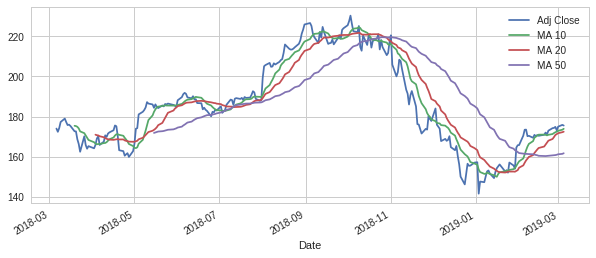

In [19]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [0]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [21]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2018-03-06,178.250000,176.130005,177.910004,176.669998,23788500.0,174.020172,NaN,NaN,NaN,NaN
2018-03-07,175.850006,174.270004,174.940002,175.029999,31703500.0,172.404770,NaN,NaN,NaN,-0.009283
2018-03-08,177.119995,175.070007,175.479996,176.940002,23774100.0,174.286118,NaN,NaN,NaN,0.010912
2018-03-09,180.000000,177.389999,177.960007,179.979996,32185200.0,177.280518,NaN,NaN,NaN,0.017181
2018-03-12,182.389999,180.210007,180.289993,181.720001,32207100.0,178.994415,NaN,NaN,NaN,0.009668


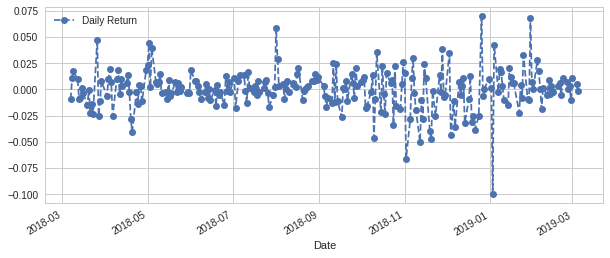

In [22]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


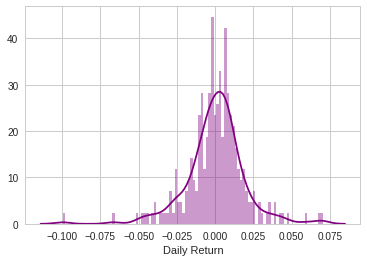

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

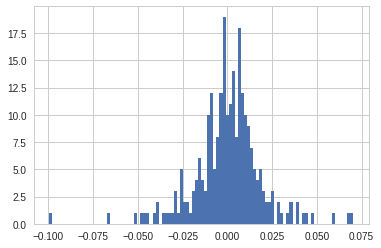

In [24]:
AAPL['Daily Return'].hist(bins=100)

In [0]:
closing_df = web.DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'], 'yahoo', start, end)['Adj Close']

In [0]:
tech_rets = closing_df.pct_change()

In [27]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-06,NaN,NaN,NaN,NaN
2018-03-07,-0.009283,0.004787,0.013314,0.005787
2018-03-08,0.010912,0.004440,0.014744,0.006073
2018-03-09,0.017181,0.017418,0.030231,0.022345
2018-03-12,0.009668,0.012350,0.003845,0.002382


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


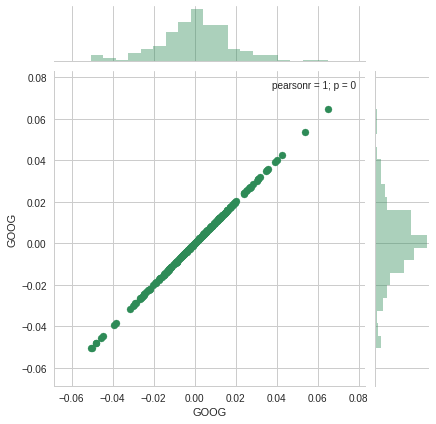

In [28]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


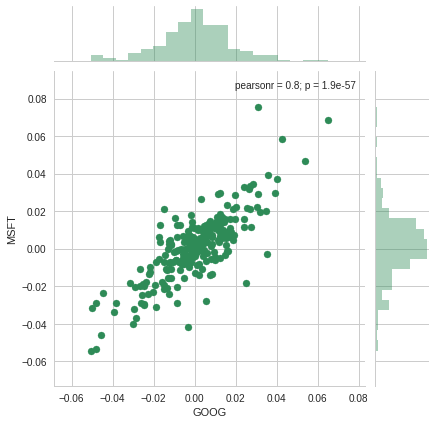

In [29]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

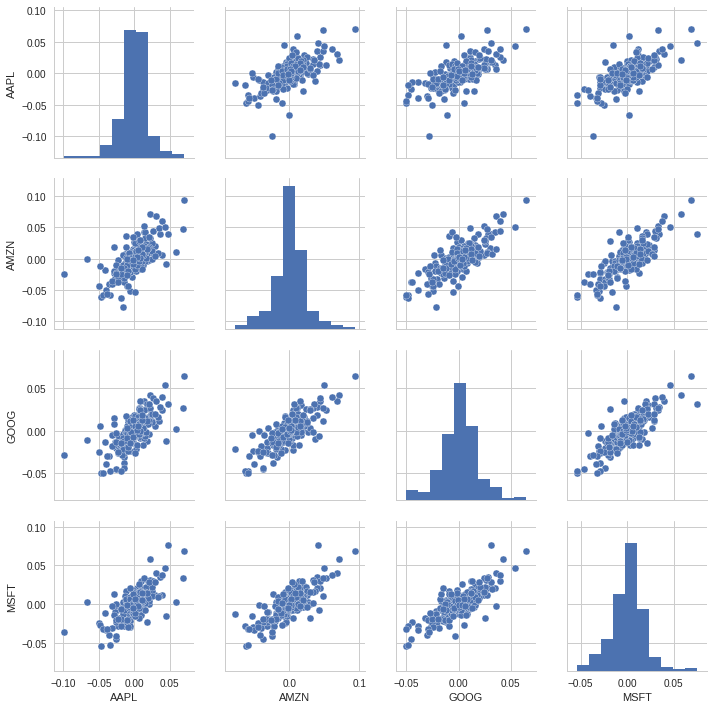

In [30]:
sns.pairplot(tech_rets.dropna())

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


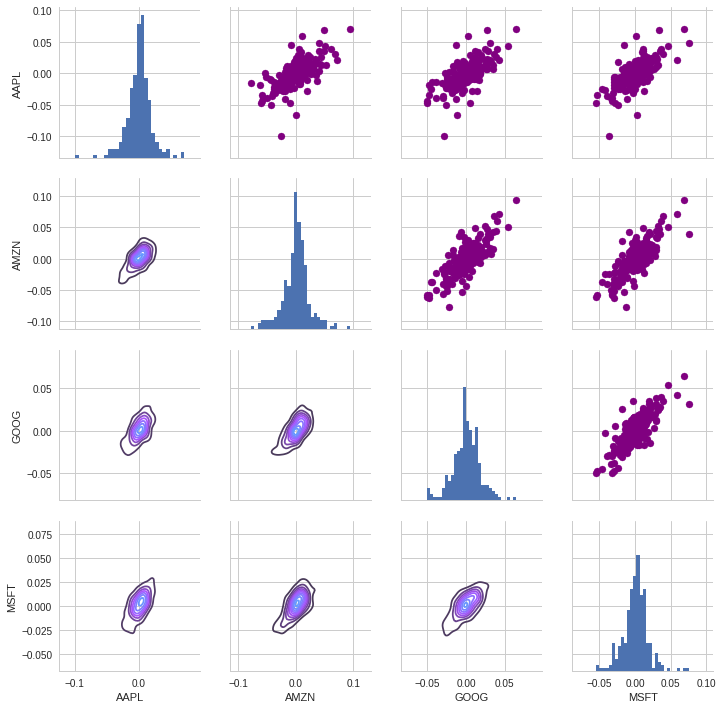

In [31]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


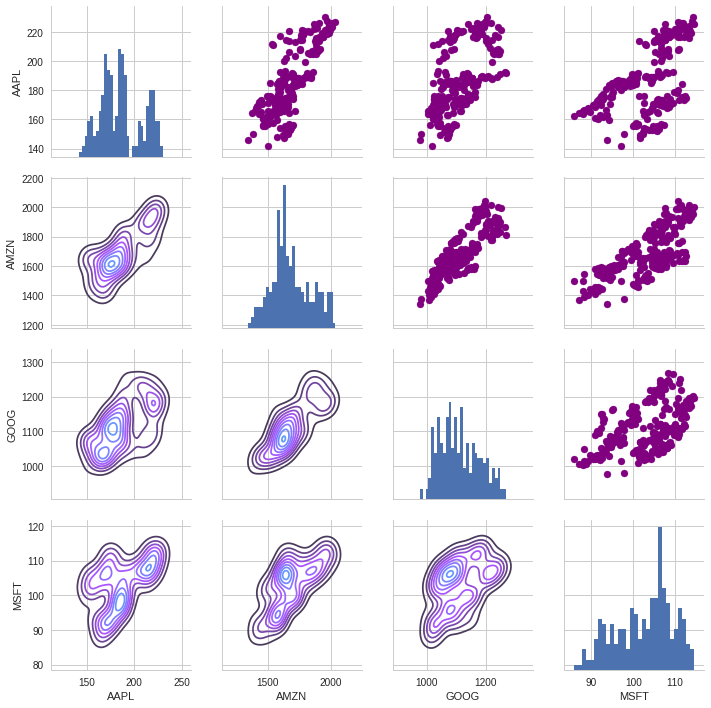

In [32]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

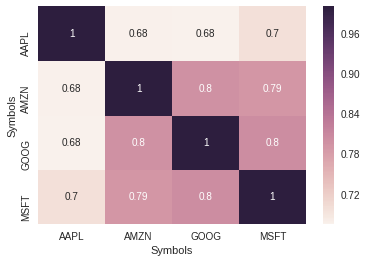

In [33]:
sns.heatmap(tech_rets.corr(), annot=True)

In [0]:
rets = tech_rets.dropna()

In [35]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-07,-0.009283,0.004787,0.013314,0.005787
2018-03-08,0.010912,0.004440,0.014744,0.006073
2018-03-09,0.017181,0.017418,0.030231,0.022345
2018-03-12,0.009668,0.012350,0.003845,0.002382
2018-03-13,-0.009630,-0.006388,-0.022611,-0.024388


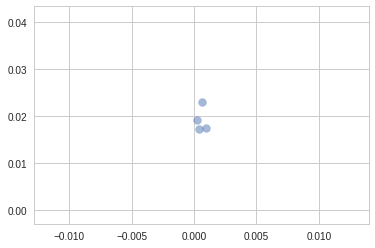

In [36]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi*20)

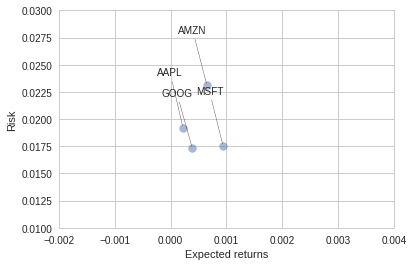

In [37]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi*20)
plt.ylim([0.01, 0.030])
plt.xlim([-0.002, 0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x,y), xytext=(0,50),
              textcoords = 'offset points', ha = 'right', va='bottom',
              arrowprops=dict(arrowstyle='-', connectionstyle='arc3'))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


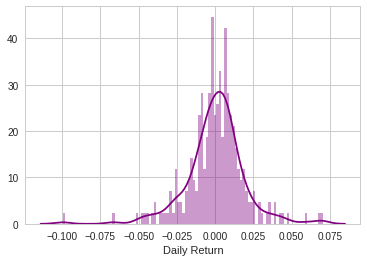

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [39]:
rets['AAPL'].quantile(0.05)

-0.029930148516846986

In [0]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [0]:
def stock_monte_carlo(start_price, daays, mu, sigma):
  price = np.zeros(days)
  price[0] = start_price
  shock = np.zeros(days)
  drift = np.zeros(days)
  
  for x in range(1, days):
    shock[x] = np.random.normal(loc=mu*dt, scale=sigma * np.sqrt(dt))
    drift[x] = mu * dt
    price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
  return price

In [43]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-06,1101.849976,1089.775024,1099.219971,1095.060059,1532800,1095.060059
2018-03-07,1112.219971,1085.482056,1089.189941,1109.640015,1292500,1109.640015
2018-03-08,1127.599976,1112.800049,1115.319946,1126.000000,1355100,1126.000000
2018-03-09,1160.800049,1132.461060,1136.000000,1160.040039,2128000,1160.040039
2018-03-12,1177.050049,1157.420044,1163.849976,1164.500000,2172300,1164.500000


Text(0.5, 1.0, 'Monte Carlo Analysis')

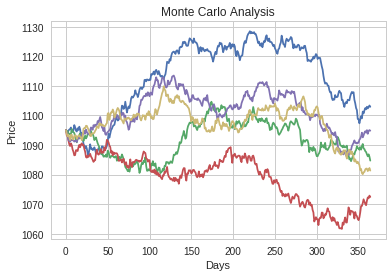

In [53]:
start_price = GOOG.iloc[0,5]

for run in range(5):
  plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [0]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 1., 1., ..., 0., 0., 1.]),
 array([1034.5065213 , 1035.16789005, 1035.8292588 , ..., 1165.45753373,
        1166.11890248, 1166.78027123]),
 <a list of 200 Patch objects>)

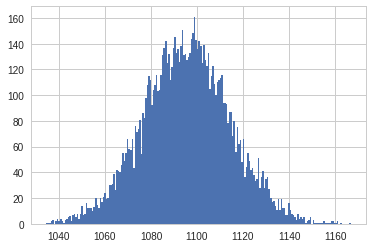

In [59]:
plt.hist(simulations, bins=200)

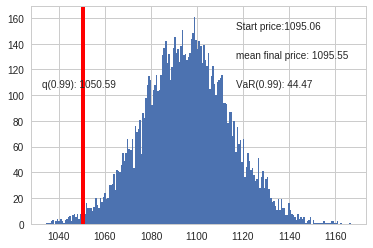

In [66]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price:{:0.2f}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price: {:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth=4, color='r')